For U-net coding and training, i'm following this guide:<br> 
https://medium.com/@vipul.sarode007/u-net-unleashed-a-step-by-step-guide-on-implementing-and-training-your-own-segmentation-model-in-a38741776968

In [2]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm 
import matplotlib.pyplot as plt

# import sys
# sys.path.insert(1, '/kaggle/input/unetscratch')  
import unet

import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input, concatenate, Flatten, Dropout

1. Load images

In [40]:
image_dir = '../data/u-net-data/512_jpg/training/'
mask_dir = '../data/u-net-data/512_jpg/training-labels/'

imgsort = sorted(os.listdir(image_dir))
masksort = sorted(os.listdir(mask_dir))


In [41]:
len(imgsort), len(masksort)

(110, 110)

In [24]:
imgsort

['20250527212624.jpg',
 '20250527212634.jpg',
 '20250527212639.jpg',
 '20250527212643.jpg',
 '20250527212651.jpg',
 '20250527212654.jpg',
 '20250527212658.jpg',
 '20250527212726.jpg',
 '20250527212731.jpg',
 '20250527212735.jpg',
 '20250527212749.jpg',
 '20250527212753.jpg',
 '20250527212756.jpg',
 '20250527212800.jpg',
 '20250527212803.jpg',
 '20250527212807.jpg',
 '20250527212915.jpg',
 '20250527212943.jpg',
 '20250527212947.jpg',
 '20250527213001.jpg',
 '20250527213020.jpg',
 '20250527213024.jpg',
 '20250527213048.jpg',
 '20250527213105.jpg',
 '20250527213123.jpg',
 '20250527213139.jpg',
 '20250527213208.jpg',
 '20250527213347.jpg',
 '20250527213402.jpg',
 '20250527213410.jpg',
 '20250527213426.jpg',
 '20250527213445.jpg',
 '20250527213635.jpg',
 '20250527213654.jpg',
 '20250527213658.jpg',
 '20250527213705.jpg',
 '20250527213729.jpg',
 '20250527213742.jpg',
 '20250527213809.jpg',
 '20250527213817.jpg',
 '20250527213831.jpg',
 '20250527213835.jpg',
 '20250527213921.jpg',
 '202505280

In [42]:
#loading the images, converting them to grayscale and resizing them to (256,256)
def load_images(imgsort, masksort, image_dir, mask_dir):
    images, masks = [], []

    for img, msk in tqdm(zip(imgsort, masksort), total = len(imgsort), desc = 'Loading Images and Masks'):
        image = cv2.imread(image_dir + img, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_dir + msk, cv2.IMREAD_GRAYSCALE)

        image = cv2.resize(image, (512,512))
        mask = cv2.resize(mask, (512,512))

#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        images.append(image)
        masks.append(mask)

        del image, mask
        
    return images, masks
    
images, masks = load_images(imgsort, masksort, image_dir, mask_dir)



Loading Images and Masks: 100%|██████████| 110/110 [00:00<00:00, 650.70it/s]


In [43]:
#Visualizing Images and Masks for Sanity
def plot_image_with_mask(image_list, mask_list, num_pairs = 4):
    plt.figure(figsize = (18,9))
    for i in range(num_pairs):
        idx = random.randint(0, len(image_list))
        img = image_list[idx]
        mask = mask_list[idx]
        plt.subplot(2, 4, i + 1)
        plt.imshow(img)
        plt.title(f'Real Image, index = {idx}')
        plt.axis('off')
        plt.subplot(2, 4, i + num_pairs + 1)
        plt.imshow(mask)
        plt.title(f'Segmented Image, index = {idx}')
        plt.axis('off')
        del img, mask

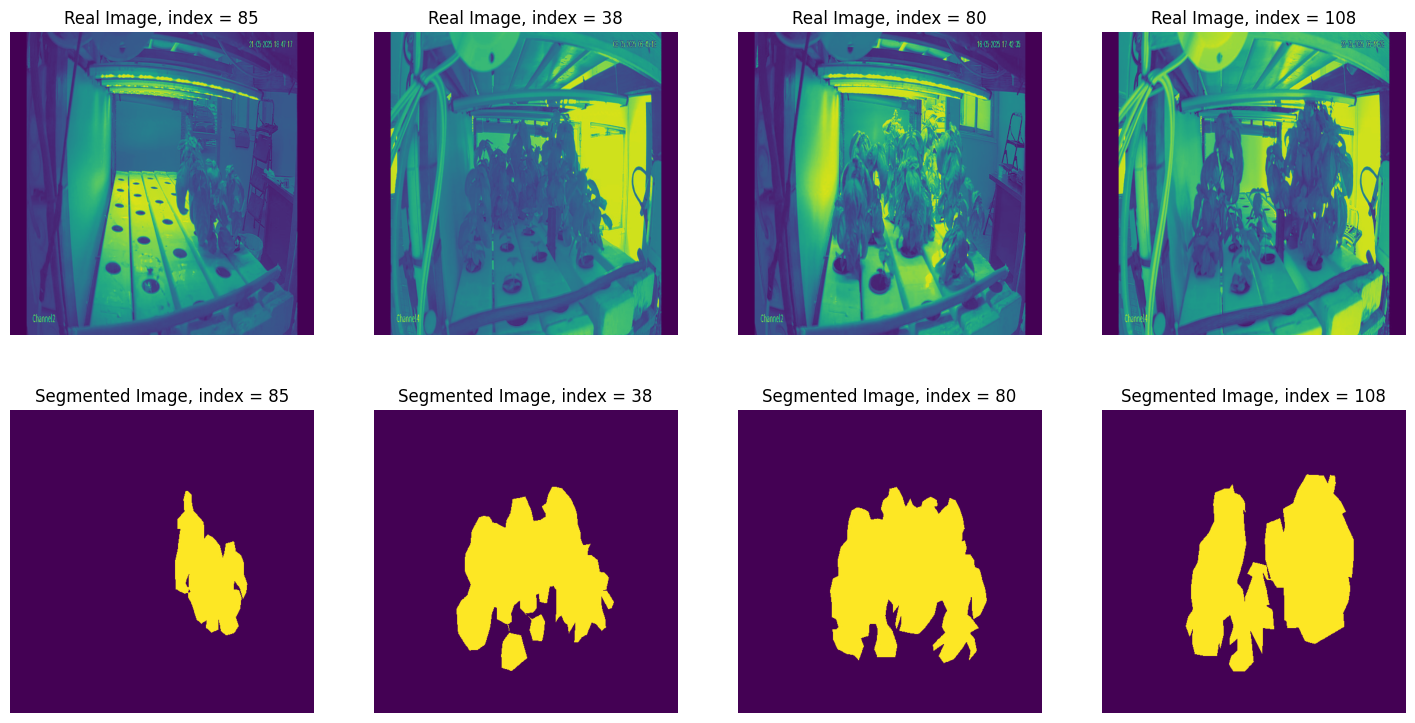

In [44]:
plot_image_with_mask(images, masks, num_pairs = 4)